In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/train.csv")
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [3]:
df_claimed = df[df["is_claim"] == 1]
df_no_claim = df[df["is_claim"] == 0]

In [4]:
df_no_claim

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [5]:
df["is_claim"].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [6]:
df_claimed.groupby("policy_tenure")["is_claim"].value_counts()

policy_tenure  is_claim
0.002850       1           1
0.003171       1           1
0.003221       1           1
0.003246       1           1
0.005552       1           1
                          ..
1.249389       1           1
1.249742       1           1
1.249881       1           1
1.290992       1           1
1.335945       1           1
Name: count, Length: 3748, dtype: int64

Text(0.5, 1.0, 'policy tenure v/s is_claim')

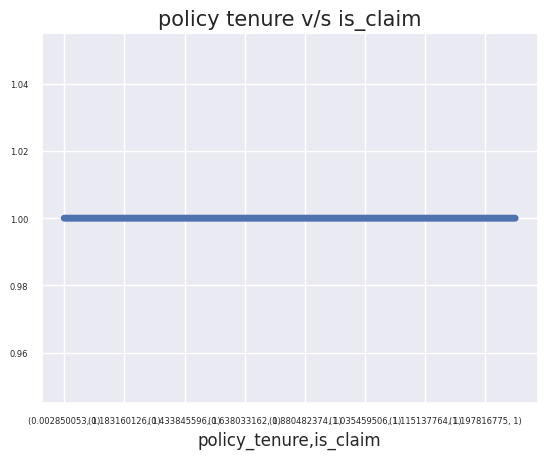

In [7]:
df_claimed.groupby("policy_tenure")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="policy tenure v/s is_claim", loc="center", fontdict={"fontsize": 15})

In [8]:
df_claimed.groupby("age_of_car")["is_claim"].value_counts()

age_of_car  is_claim
0.00        1           559
0.01        1           295
0.02        1           313
0.03        1           272
0.04        1           248
0.05        1           226
0.06        1           206
0.07        1           206
0.08        1           174
0.09        1           167
0.10        1           215
0.11        1           166
0.12        1           153
0.13        1           140
0.14        1           124
0.15        1            87
0.16        1            62
0.17        1            40
0.18        1            31
0.19        1            17
0.20        1            15
0.21        1            10
0.22        1             9
0.23        1             4
0.25        1             2
0.26        1             1
0.30        1             1
0.32        1             2
0.33        1             2
0.35        1             1
Name: count, dtype: int64

Text(0.5, 1.0, 'age_of_car v/s is_claim')

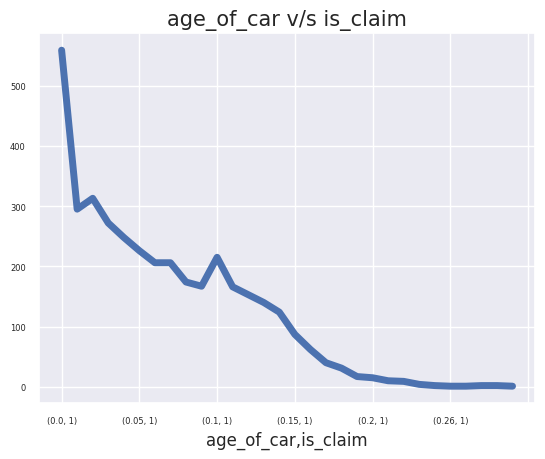

In [9]:
df_claimed.groupby("age_of_car")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="age_of_car v/s is_claim", loc="center", fontdict={"fontsize": 15})

In [10]:
df_claimed.groupby("make")["is_claim"].value_counts()

make  is_claim
1     1           2455
2     1            128
3     1            901
4     1            131
5     1            133
Name: count, dtype: int64

In [11]:
denom = 100 / len(df_claimed["is_claim"])
denom

0.026680896478121666

In [12]:
df_claimed.groupby("make")["is_claim"].value_counts() * denom

make  is_claim
1     1           65.501601
2     1            3.415155
3     1           24.039488
4     1            3.495197
5     1            3.548559
Name: count, dtype: float64

Text(0.5, 1.0, 'make v/s is_claim')

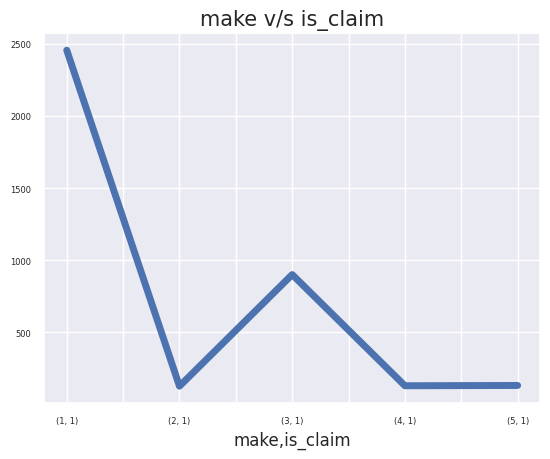

In [13]:
df_claimed.groupby("make")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="make v/s is_claim", loc="center", fontdict={"fontsize": 15})

In [14]:
df_claimed.groupby("gross_weight")["is_claim"].value_counts() * denom

gross_weight  is_claim
1051          1            3.548559
1155          1            3.415155
1185          1           24.493063
1335          1           27.187834
1340          1            6.510139
1410          1            5.362860
1490          1            3.094984
1510          1            1.947705
1660          1            0.400213
1720          1           24.039488
Name: count, dtype: float64

Text(0.5, 1.0, 'gross_weight v/s is_claim')

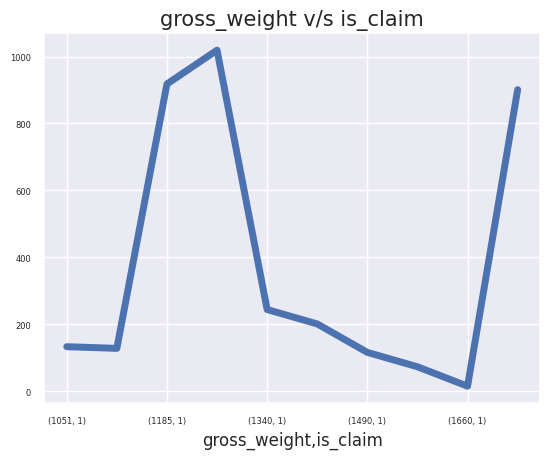

In [15]:
df_claimed.groupby("gross_weight")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="gross_weight v/s is_claim", loc="center", fontdict={"fontsize": 15})

what is the make of the vehicle with weight of 1660

In [16]:
df_claimed.groupby("engine_type")["is_claim"].value_counts() * denom

engine_type                is_claim
1.0 SCe                    1            3.415155
1.2 L K Series Engine      1            5.362860
1.2 L K12N Dualjet         1            2.134472
1.5 L U2 CRDi              1           24.039488
1.5 Turbocharged Revotorq  1            3.094984
1.5 Turbocharged Revotron  1            0.400213
F8D Petrol Engine          1           24.493063
G12B                       1            1.947705
K Series Dual jet          1           25.053362
K10C                       1            6.510139
i-DTEC                     1            3.548559
Name: count, dtype: float64

Text(0.5, 1.0, 'engine_type v/s is_claim')

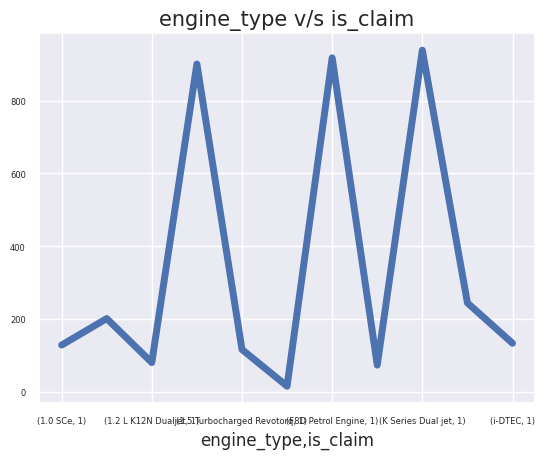

In [17]:
df_claimed.groupby("engine_type")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="engine_type v/s is_claim", loc="center", fontdict={"fontsize": 15})

In [18]:
df_claimed.groupby("age_of_policyholder")["is_claim"].value_counts() * denom

age_of_policyholder  is_claim
0.288462             1           2.054429
0.298077             1           2.588047
0.307692             1           2.321238
0.317308             1           2.374600
0.326923             1           2.241195
                                   ...   
0.865385             1           0.080043
0.875000             1           0.053362
0.894231             1           0.026681
0.932692             1           0.026681
0.951923             1           0.026681
Name: count, Length: 65, dtype: float64

Text(0.5, 1.0, 'age_of_policyholder v/s is_claim')

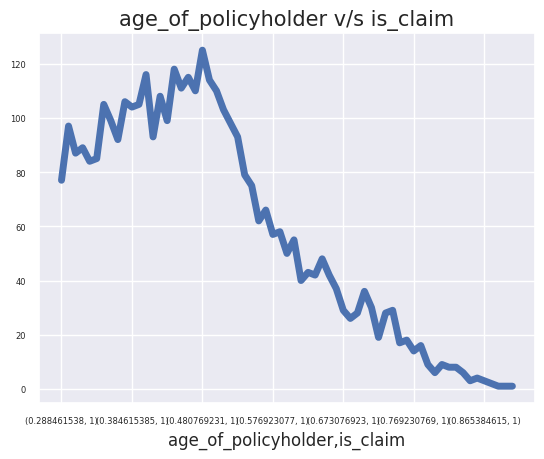

In [19]:
df_claimed.groupby("age_of_policyholder")["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="age_of_policyholder v/s is_claim", loc="center", fontdict={"fontsize": 15})

In [20]:
df_claimed.groupby(["age_of_car", "ncap_rating"])["is_claim"].value_counts()

age_of_car  ncap_rating  is_claim
0.00        0            1           474
            2            1            47
            3            1            21
            4            1            11
            5            1             6
                                    ... 
0.32        2            1             1
            3            1             1
0.33        0            1             1
            3            1             1
0.35        2            1             1
Name: count, Length: 117, dtype: int64

In [21]:
df_claimed.groupby(["age_of_car", "ncap_rating"])["is_claim"].value_counts() * denom

age_of_car  ncap_rating  is_claim
0.00        0            1           12.646745
            2            1            1.254002
            3            1            0.560299
            4            1            0.293490
            5            1            0.160085
                                       ...    
0.32        2            1            0.026681
            3            1            0.026681
0.33        0            1            0.026681
            3            1            0.026681
0.35        2            1            0.026681
Name: count, Length: 117, dtype: float64

Text(0.5, 1.0, 'mix v/s is_claim')

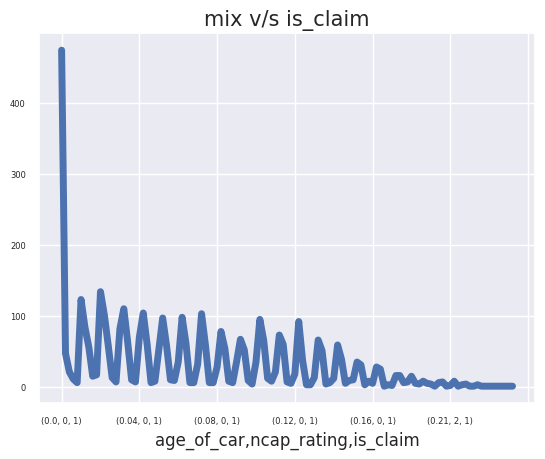

In [22]:
df_claimed.groupby(["age_of_car", "ncap_rating"])["is_claim"].value_counts().plot(kind="line", linewidth="5")
plt.tick_params(axis="both", labelsize=6)
plt.title(label="mix v/s is_claim", loc="center", fontdict={"fontsize": 15})

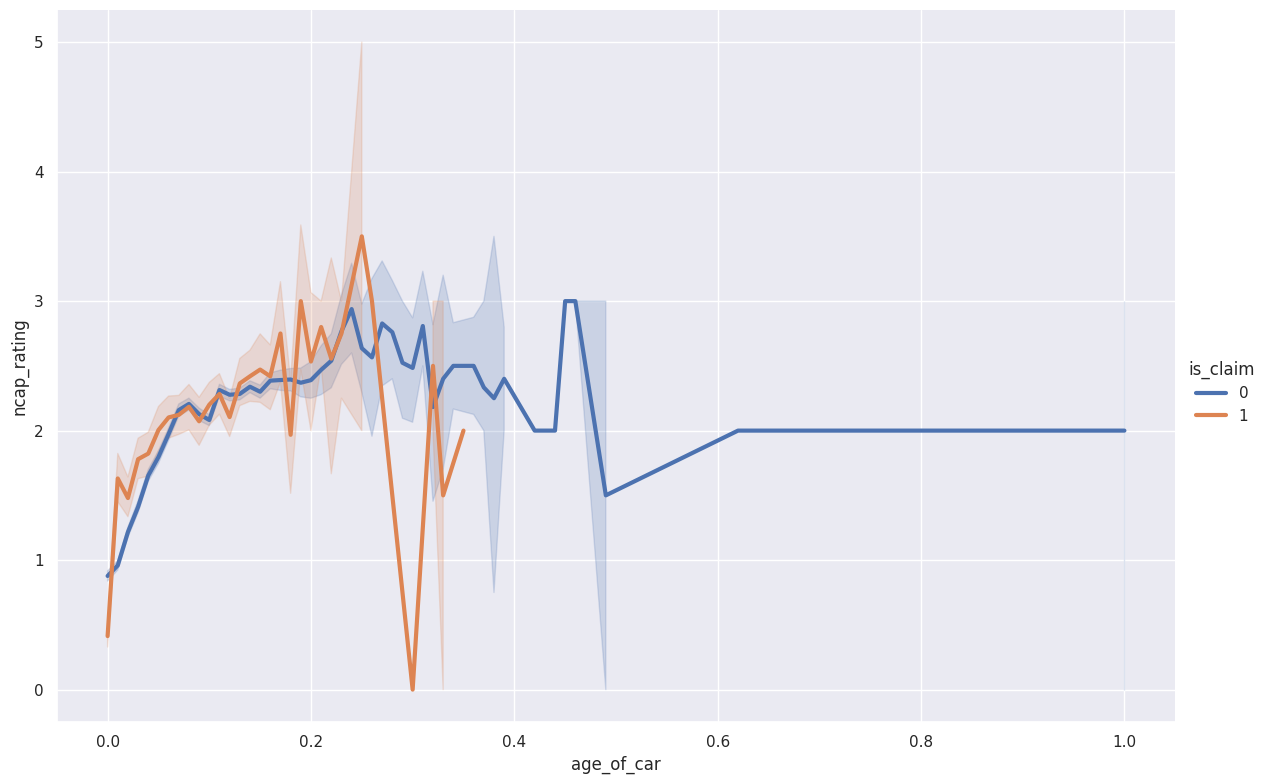

In [23]:
sns.relplot(df, x="age_of_car", y="ncap_rating", height=8, aspect=1.5, hue="is_claim", kind="line", linewidth=3)
plt.show()

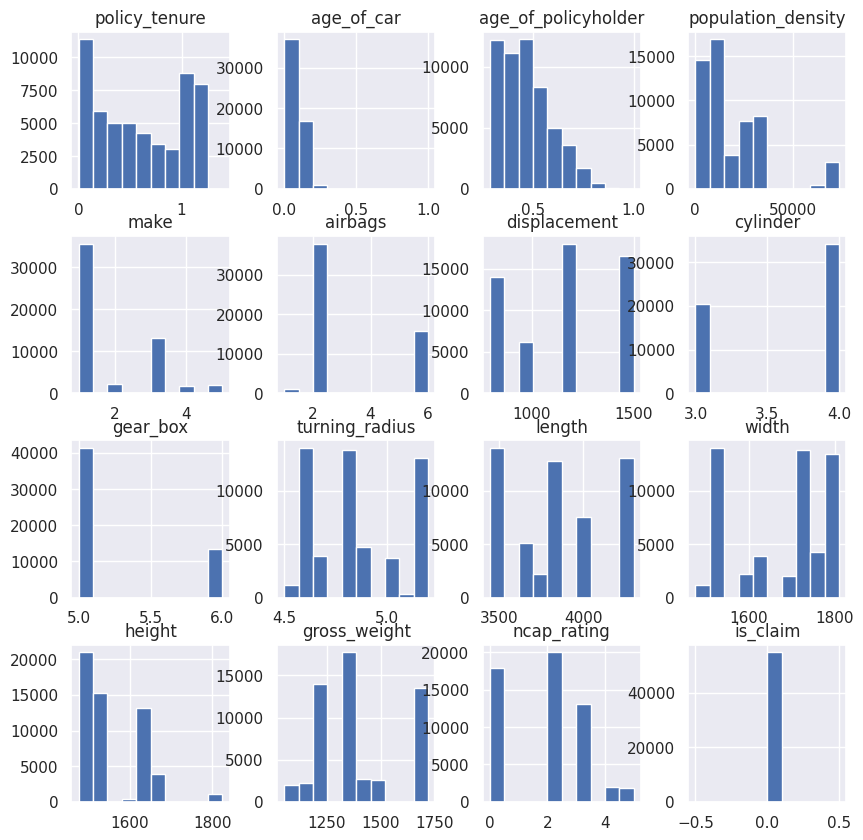

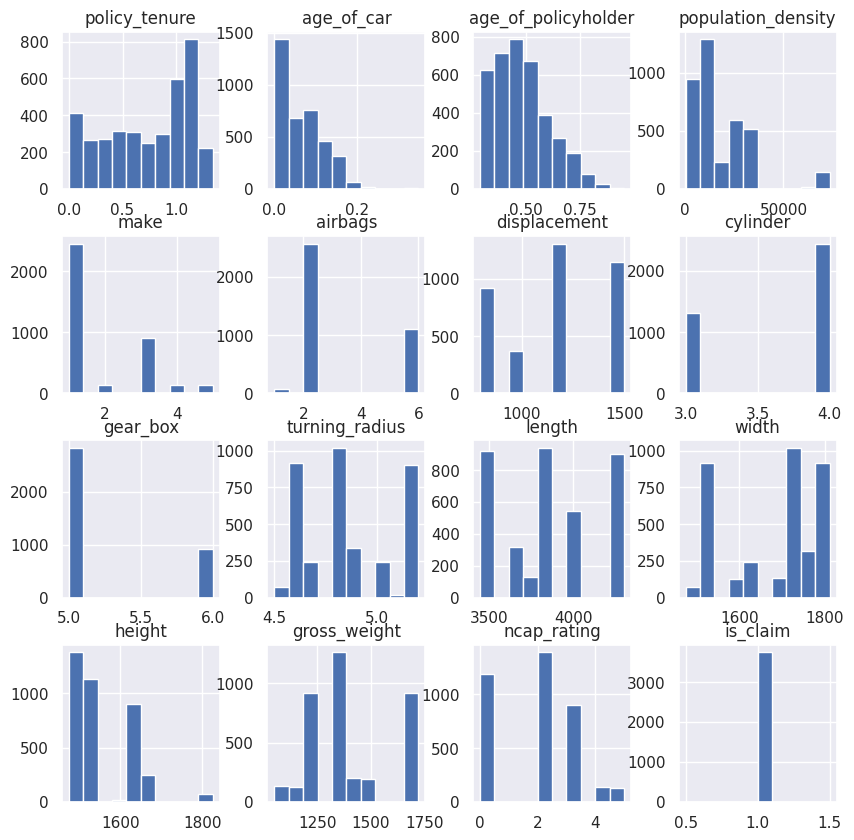

In [24]:
df1 = df.groupby("is_claim")
df1.hist(figsize=(10, 10))
plt.show()

In [25]:
cols = df.select_dtypes(exclude='object')

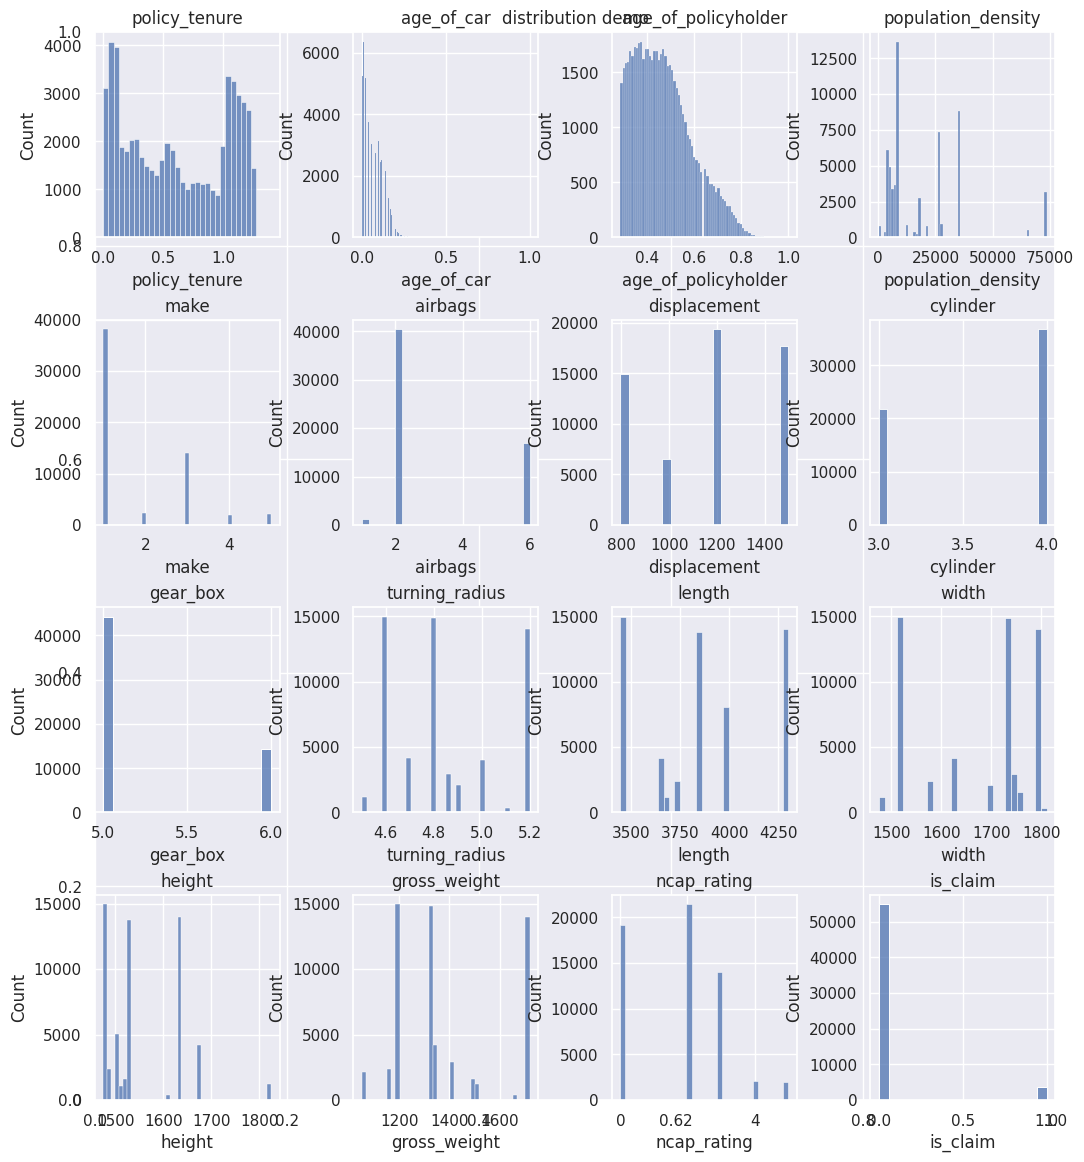

In [26]:
k = 1
plt.figure(figsize=(12, 12))
plt.tight_layout()
plt.title("distribution demo")
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    top=1,
    wspace=0.4,
    hspace=0.4
)

for i in cols.loc[:, :]:
    plt.subplot(4, 4, k)
    sns.histplot(df[i])
    plt.title(i)
    k+=1

In [27]:
df = pd.read_csv("data/City Power Consumption.csv")
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [28]:
df.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [29]:
df[df.isnull().any(axis=1)]

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
87,88,NaN,54.06,0.075,449.2,41.52,152.0,1,18036.47416
88,89,NaN,55.56,0.075,437.4,44.13,151.0,1,17996.35258
89,90,NaN,56.69,0.077,422.0,43.87,159.0,1,17952.58359
90,91,NaN,57.26,0.077,409.0,44.90,157.0,1,17894.22492
91,92,NaN,57.96,0.074,391.8,46.89,153.0,1,17846.80851
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.2,38.96,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.6,37.73,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.4,37.49,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.0,37.37,152.0,0,33988.86076


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [31]:
pd.to_numeric(df["Temperature"])

ValueError: Unable to parse string "5.488 dc" at position 470

In [32]:
df["Temperature"].iloc[470]= 5.488

In [33]:
df["Temperature"].iloc[1757]= 13.65

In [34]:
df["Temperature"].iloc[2287]= 12.31

In [35]:
pd.to_numeric(df["Temperature"])

0        6.559
1        6.414
2        6.313
3        6.121
4        5.921
         ...  
52578      NaN
52579      NaN
52580      NaN
52581      NaN
52582      NaN
Name: Temperature, Length: 52583, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [37]:
df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  float64
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [39]:
pd.to_numeric(df["Humidity"])

ValueError: Unable to parse string "84.8 i" at position 719

In [40]:
df["Humidity"].iloc[719]= 84.8

In [41]:
pd.to_numeric(df["Humidity"])

0        73.80
1        74.50
2        74.50
3        75.00
4        75.70
         ...  
52578    75.60
52579    73.50
52580    70.10
52581    67.75
52582    66.24
Name: Humidity, Length: 52583, dtype: float64

In [42]:
df["Humidity"] = pd.to_numeric(df["Humidity"], errors="coerce")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  float64
 2   Humidity                      52558 non-null  float64
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.6+ MB


In [44]:
pd.to_numeric(df["Wind Speed"])

ValueError: Unable to parse string "8.50%" at position 41

In [45]:
df["Wind Speed"].iloc[41]= 8.5

In [46]:
df["Wind Speed"].iloc[139]= 8.5

In [47]:
df["Wind Speed"].iloc[144]= 8.5

In [48]:
df["Wind Speed"].iloc[174]= 8.5

In [49]:
pd.to_numeric(df["Wind Speed"])

0        0.083
1        0.083
2        0.080
3        0.083
4        0.081
         ...  
52578    0.094
52579    0.089
52580    0.085
52581    0.086
52582    0.088
Name: Wind Speed, Length: 52583, dtype: float64

In [50]:
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"], errors="coerce")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  float64
 2   Humidity                      52558 non-null  float64
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [52]:
df.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

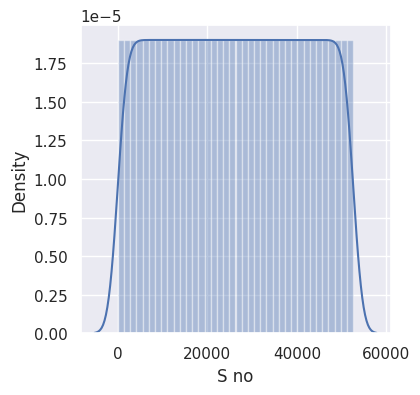

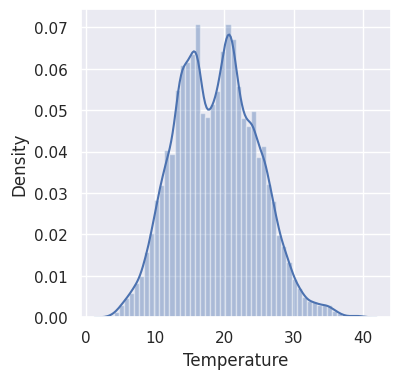

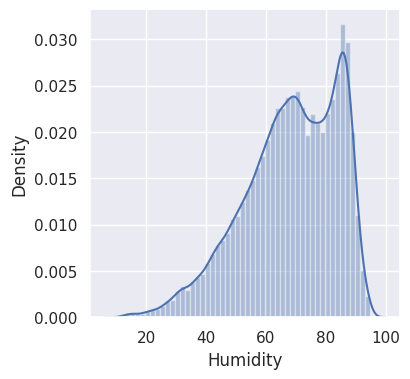

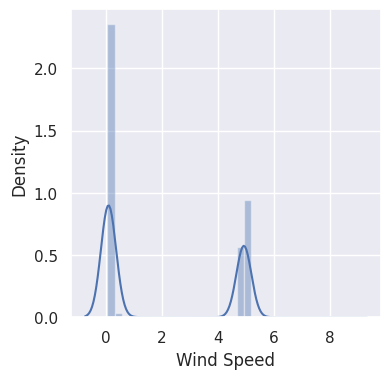

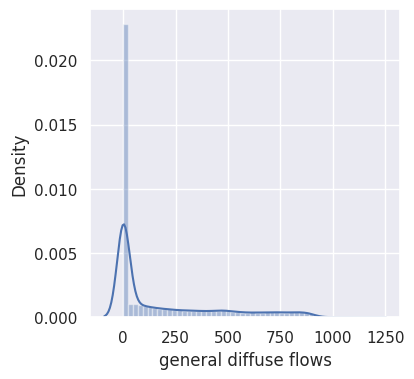

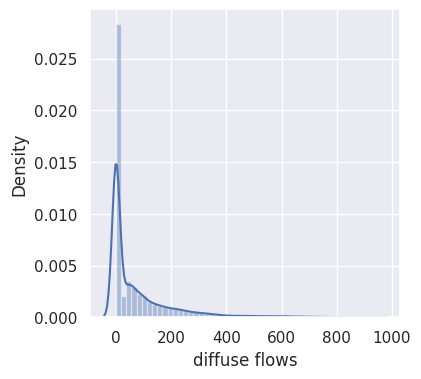

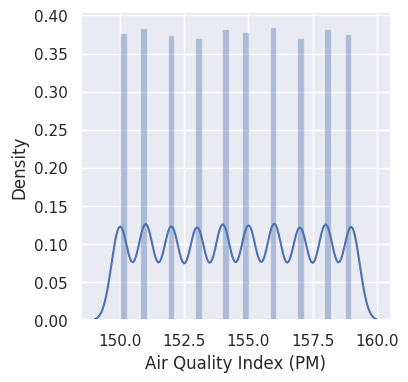

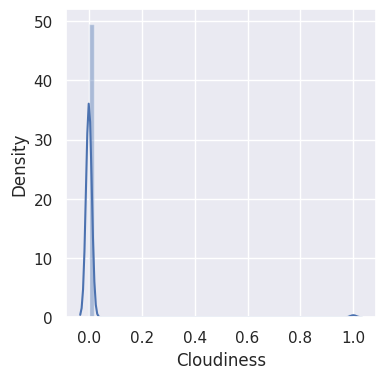

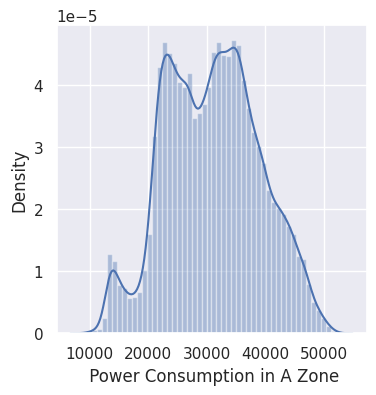

In [53]:
def distplot(col):
    plt.figure(figsize=(4, 4))
    sns.distplot(df[col])
    plt.show()

for i in df.columns:
    distplot(i)

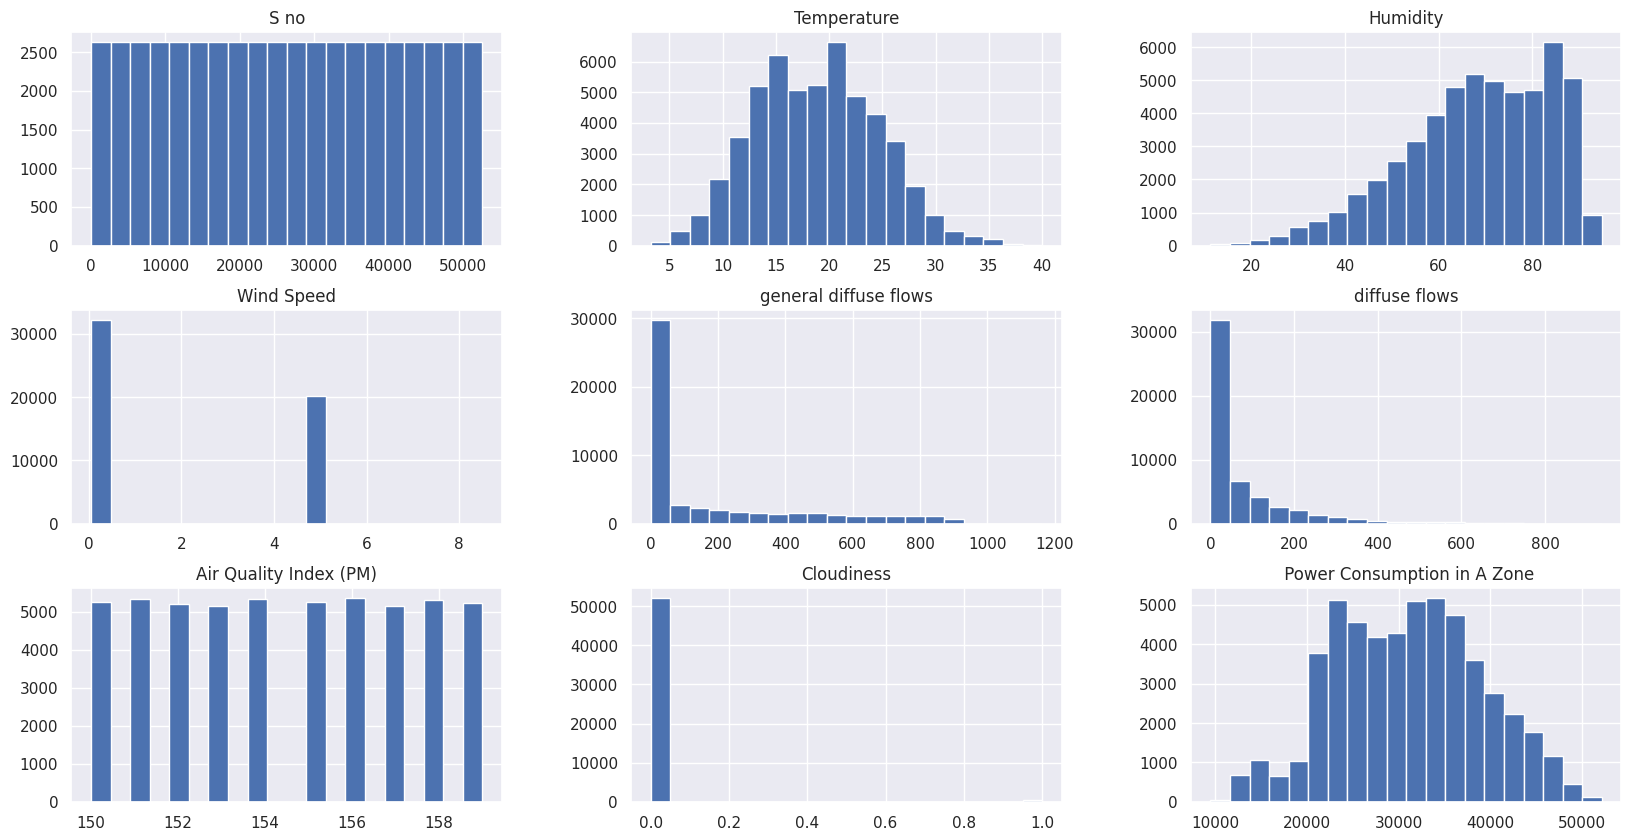

In [54]:
df.hist(bins=20, figsize=(20, 10))
plt.show()

In [55]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].median())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].median())
df['general diffuse flows'] = df['general diffuse flows'].fillna(df['general diffuse flows'].median())
df['diffuse flows'] = df['diffuse flows'].fillna(df['diffuse flows'].median())
df['Air Quality Index (PM)'] = df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].median())

In [56]:
df.isnull().sum()

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64